In [8]:
import pandas as pd

# Load AUTO-TOPAS

In [9]:
topas_df = pd.read_csv("./final/GAS-001/V5/aspect_ratio.txt", names=["Sample ID","Rwp", "00n Size", "Isotropic Size", "Aspect Ratio"])
topas_df["Sample ID"] = topas_df["Sample ID"].str.replace(".raw", "")
topas_df.set_index("Sample ID", inplace=True)
topas_df.sort_index().head(100)

,Rwp,00n Size,Isotropic Size,Aspect Ratio
Sample ID,,,,
EXP0-1,71.00,56.98,15.36,3.71
EXP1-1,47.15,74.82,56.64,1.32
EXP10,43.32,43.95,16.67,2.64
EXP11,17.20,37.15,15.58,2.38
EXP12,36.34,46.53,13.01,3.58
...,...,...,...,...
EXP86,16.40,28.14,11.30,2.49
EXP87,16.68,27.42,11.41,2.40
EXP88,21.01,34.20,11.08,3.09


# Load XY data

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# change resolution of plot
from matplotlib import rcParams
rcParams["font.size"] = 12
rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 400
plt.rcParams["mathtext.fontset"] = "stix"

# Directory containing your raw files
directory = "./final/GAS-001/V5/xy/"

# List all raw files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.xy')]  # Adjust the extension if necessary

# Analyzing each file
dict_xy = {
    "2theta": [],
}

file = files[0]
file_path = os.path.join(directory, file)
df_ = pd.read_csv(file_path, sep="\s+", skiprows=1, names=["2theta", "intensity"], dtype=float)
dict_xy["2theta"].extend(df_["2theta"])

thetha2 = []
for file in files:
    file_path = os.path.join(directory, file)
    df_ = pd.read_csv(file_path, sep="\s+", skiprows=1, names=["2theta", "intensity"], dtype=float)
    file_name = file.split("_exported.")[0]
    dict_xy[file_name] = df_["intensity"].tolist()
    
df_xy = pd.DataFrame(dict_xy).set_index("2theta")



# [35.496 ° - 36.859 °]
# [34.012 ° - 34.648 °]
# [31.015 ° - 32.226 °]
# [10.001 ° - 20.084 °]
#calculate the max intensity in each range

df_maxs = df_xy[(df_xy.index >= 35.496) & (df_xy.index <= 36.859)].max(axis=0).to_frame().reset_index().rename(columns={"index": "Sample ID", 0: "Int. 1"}) 
df_maxs["Int. 2"] = df_xy[(df_xy.index >= 34.012) & (df_xy.index <= 34.648)].max(axis=0).to_frame().reset_index()[0]
df_maxs["Int. 3"] = df_xy[(df_xy.index >= 31.015) & (df_xy.index <= 32.226)].max(axis=0).to_frame().reset_index()[0]
df_maxs["Int. 4"] = df_xy[(df_xy.index >= 10.001) & (df_xy.index <= 20.084)].max(axis=0).to_frame().reset_index()[0]

df_maxs["2theta 1"] = df_xy[(df_xy.index >= 35.496) & (df_xy.index <= 36.859)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 2"] = df_xy[(df_xy.index >= 34.012) & (df_xy.index <= 34.648)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 3"] = df_xy[(df_xy.index >= 31.015) & (df_xy.index <= 32.226)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 4"] = df_xy[(df_xy.index >= 10.001) & (df_xy.index <= 20.084)].idxmax(axis=0).to_frame().reset_index()[0]


df_maxs["Peak Ratio"] = df_maxs["Int. 1"] / (df_maxs["Int. 1"] + df_maxs["Int. 4"])
df_maxs.style.format({"Peak Ratio": "{:.2%}"})

# cm = plt.get_cmap("tab10")

# for _, row in df_maxs.iterrows():
#     sample_id = row["Sample ID"]
#     xy = df_xy[sample_id]
#     plt.figure(figsize=(6, 5))
#     plt.plot(df_xy.index, xy, label=sample_id, linewidth=0.5, color="black")

#     # annot_str = "".join([f'{row["2theta 1"]:.2f}, {row["Int. 1"]:.2f}\n', f'{row["2theta 2"]:.2f}, {row["Int. 2"]:.2f}\n', f'{row["2theta 3"]:.2f}, {row["Int. 3"]:.2f}\n', f'{row["2theta 4"]:.2f}, {row["Int. 4"]:.2f}\n'])
#     #list comp with label
#     annot_str = "".join([f'Peak {i}: {row[f"2theta {i}"]:.2f}, {row[f"Int. {i}"]:.2f}\n' for i in range(1, 5)])
#     # Adding vertical lines and annotating peaks with tuples of (2theta, Intensity)
#     for i in range(1, 5):
#         peak_x = row[f"2theta {i}"]
#         peak_y = row[f"Int. {i}"]
#         # plt.axvline(x=peak_x, color='grey', linestyle='--', alpha=0.5)
#         # plt.annotate(f'({peak_x:.2f}, {peak_y:.2f})', (peak_x, peak_y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
#         #match color of annotation to line and offset each annotation
        
#         #peak_y = middel of plot
#         annot_y = max(xy) / 2
#         plt.axvline(x=peak_x, color=cm.colors[i-1], linestyle='-.', alpha=1.,linewidth=0.5)
#         # plot a small x at the peak
#         plt.scatter(peak_x, peak_y, marker='x', color=cm.colors[i-1], s=10)
#         plt.annotate(f'({peak_x:.2f}, {peak_y:.2f})', (peak_x, annot_y+i*annot_y/10),
#                      textcoords="offset points", xytext=(0,10), ha='left', fontsize=6, color=cm.colors[i-1])
    

#     # Adding peak ratio as a comment
#     plt.text(0.95, 0.95, r'Peak Ratio $\frac{1}{4+1}$' + f': {row["Peak Ratio"]:.2%}\n {annot_str}', transform=plt.gca().transAxes, 
#              horizontalalignment='right', verticalalignment='top', fontsize=6, bbox=dict(facecolor='white', alpha=0.5))

#     plt.xlabel('2theta')
#     plt.ylabel('Intensity')
#     plt.title(f'XRD of {sample_id}')
#     # plt.legend(loc='lower right', fontsize=6)
#     plt.grid(True)
#     plt.savefig(f'./XRD/xy_plot/{sample_id}.png', dpi=400)
#     plt.close()

,Sample ID,Int. 1,Int. 2,Int. 3,Int. 4,2theta 1,2theta 2,2theta 3,2theta 4,Peak Ratio
0,EXP0-1,12.917000,11.979000,12.135000,56.458000,36.132000,34.224400,31.590200,11.031000,18.62%
1,EXP1-1,1.042000,1.146000,1.198000,21.354000,35.738300,34.496900,31.317700,11.031000,4.65%
2,EXP10,73.385000,39.323000,66.510000,208.125000,36.132000,34.254700,31.620400,11.515400,26.07%
3,EXP11,107.135000,85.156000,72.448000,6.302000,36.132000,34.285000,31.681000,10.970400,94.44%
4,EXP12,19.427000,16.354000,14.844000,14.479000,36.071400,34.285000,31.650700,10.970400,57.30%
5,EXP13,0.990000,0.781000,0.729000,90.469000,36.222800,34.012500,31.136000,11.485100,1.08%
6,EXP14,3.073000,7.448000,11.927000,287.812000,36.010800,34.103300,31.681000,11.454900,1.06%
7,EXP15-1,62.812000,55.521000,47.708000,43.906000,36.071400,34.254700,31.590200,11.485100,58.86%
8,EXP16,4.844000,4.792000,4.531000,293.490000,35.920000,34.194100,31.681000,10.001500,1.62%
9,EXP17,57.500000,46.354000,39.427000,10.625000,36.101700,34.285000,31.650700,10.970400,84.40%


# Load synthesis data

In [12]:
# Load the data
synthesis_data = pd.read_excel(
    "./final/GAS-001/V5/experiments_final.xlsx",
    sheet_name="Clean data", header=1
)

# calculate the std of pH
# synthesis_data["std"] = synthesis_data.groupby(["id"])["pH"].transform("std")
synthesis_data["Experiment"] = "EXP" + synthesis_data["Experiment"].astype(str)
synthesis_data = synthesis_data.rename(columns={"Experiment": "Sample ID"})

display(synthesis_data.columns)

synthesis_data = synthesis_data[
    [
        "Sample ID",
        "id",
        "repeat",
        "pH",
        "Cond",
        "C_ZnCl",
        "C_NaOH/C_ZnCl",
        "C_NaOH",
        "XRD",
        "solid_rxn_ct_1%",
    ]
]

#sort by id and repeat

synthesis_data = synthesis_data.sort_values(by=["id", "repeat"])
synthesis_data

Index(['Sample ID', 'repeat', 'id', 'Q_AIR', 'Q_AC', 'Q_BD', 'C_Blk_ZnCl',
       'C_Blk_NaOH', 'C_ZnCl', 'C_NaOH/C_ZnCl', 'C_NaOH', 'Q_A', 'Q_B', 'Q_C',
       'Q_D', 'Time', 'Volume', 'Throughput', 'Unnamed: 18', 'm_ct_1_dry',
       'm_ct_2_dry', 'V_ct_rxn', 'm_ct_full', 'm_ct_disp', 'pH', 'Cond',
       'V_ct_q_1', 'V_ct_q_2', 'V_ct_q_total', 'm_ct_q_1', 'm_ct_q_2',
       'Cond_ct_q_1', 'Cond_ct_q_2', 'Comments', 'XRD', 'm_ct_m_full',
       'm_gv_empty', 'V_gv_sus', 'm_gv_full', 'm_gv_disp', 'm_gv_powder',
       'm_powder', 'solid_gv%', 'm_ct_m_solid', 'solid_rxn_ct_1%'],
      dtype='object')

,Sample ID,id,repeat,pH,Cond,C_ZnCl,C_NaOH/C_ZnCl,C_NaOH,XRD,solid_rxn_ct_1%
2,EXP2-2,0,0,9.55,17.520,0.28,1.76,0.49,1.0,0.012493
14,EXP14,0,1,9.25,16.570,0.28,1.76,0.49,1.0,0.012639
26,EXP26,0,2,9.75,17.342,0.28,1.76,0.49,1.0,0.012923
6,EXP6,1,0,12.78,56.427,0.66,2.35,1.55,2.0,0.023288
18,EXP18,1,1,12.75,55.800,0.66,2.35,1.55,2.0,0.023382
...,...,...,...,...,...,...,...,...,...,...
82,EXP82,28,1,12.21,38.680,0.53,2.22,1.18,NaN,NaN
88,EXP88,28,2,12.26,36.220,0.53,2.22,1.18,NaN,NaN
77,EXP77,29,0,13.39,129.580,0.80,3.50,2.80,NaN,NaN
83,EXP83,29,1,13.39,130.140,0.80,3.50,2.80,NaN,NaN


# Pressure Data

In [15]:
pressure_df = pd.read_excel("./final/GAS-001/V5/pressure_data.xlsx") 
pressure_df
#only keep the columns we need
# Unnamed: 0	experiment_number	pressure_a_mean	pressure_a_std	pressure_b_mean	pressure_b_std	pressure_c_mean	pressure_c_std	pressure_d_mean	pressure_d_std	pressure_air_mean	pressure_air_std	flowrate_air_mean	flowrate_air_std	_runtime_mean	_runtime_std

# a b air mean + std
pressure_df = pressure_df[["experiment_number", "pressure_a_mean", "pressure_a_std", "pressure_b_mean", "pressure_b_std", "pressure_air_mean", "pressure_air_std"]]
                           
pressure_df["Sample ID"] = "EXP" + pressure_df["experiment_number"].astype(str)
pressure_df
#join with synthesis data to get id info
pressure_df.style.format({"pressure_a_mean": "{:.2f}", "pressure_a_std": "{:.2f}", "pressure_b_mean": "{:.2f}", "pressure_b_std": "{:.2f}", "pressure_air_mean": "{:.2f}", "pressure_air_std": "{:.2f}"}).background_gradient(cmap='Blues') 

,experiment_number,pressure_a_mean,pressure_a_std,pressure_b_mean,pressure_b_std,pressure_air_mean,pressure_air_std,Sample ID
0,89,0.34,0.06,4.34,0.03,3.59,0.00,EXP89
1,88,0.37,0.13,3.23,0.05,3.59,0.01,EXP88
2,87,0.46,0.11,4.89,0.02,3.62,0.01,EXP87
3,86,1.06,0.82,4.34,0.17,3.84,0.10,EXP86
4,85,0.33,0.17,3.14,0.04,3.67,0.01,EXP85
5,84,1.62,0.63,5.02,0.18,4.10,0.13,EXP84
6,83,0.34,0.07,4.34,0.03,3.62,0.00,EXP83
7,82,0.39,0.13,3.25,0.06,3.63,0.00,EXP82
8,81,0.54,0.28,4.94,0.03,3.77,0.01,EXP81
9,80,0.80,0.36,4.11,0.07,3.71,0.03,EXP80


# Process peak data

In [16]:
import pandas as pd

# Reading the Excel file
df_peak = pd.read_excel("./final/GAS-001/V5/peaks+scherrer.xlsx")

# Extracting 'Sample ID' from 'Scan' column and renaming 'Index' column
df_peak["Sample ID"] = df_peak["Scan"].str.split(".raw").str[0]
df_peak = df_peak.rename(columns={"Index": "Peak Index"})

# Selecting only necessary columns
columns_needed = [
    "Peak Index",
    "Left Angle",
    "Right Angle",
    "Sample ID",
    "Obs. Max",
    "Gross Int.",
    "Net Height",
    "Net Area",
    "d (Obs. Max)",
    "Crystallite Size",
    "S/N Ratio",
    "P/B Ratio"
]
df_peak = df_peak[columns_needed]

# Splitting data based on 'Peak Index' and adding suffixes
df_peaks = {}
for i in range(1, 5):
    df_peaks[i] = df_peak[df_peak["Peak Index"] == i].add_suffix(f"_{i}")

# Merging dataframes on 'Sample ID' with appropriate suffixes
df_merged = df_peaks[1]
for i in range(2, 5):
    df_merged = pd.merge(df_merged, df_peaks[i], left_on=f"Sample ID_{i-1}", right_on=f"Sample ID_{i}", how="outer")

# Renaming columns for final DataFrame
final_columns = [
    f"Crystallite Size_{i}" for i in range(1, 5)
] + [
    f"Net Height_{i}" for i in range(1, 5)
]
final_columns.insert(0, "Sample ID_1")

# df_peak_p = df_merged[final_columns]
df_peak_p = df_merged
df_peak_p = df_peak_p.rename(columns={"Sample ID_1": "Sample ID"})

# # Calculating the ratio of 'Net Height_1' and 'Net Height_4'
# df_peak_p["Peak Ratio opt"] = df_peak_p["Net Height_1"] /(df_peak_p["Net Height_4"] + df_peak_p["Net Height_1"])
# display(df_peak)
#drop all the columns with constant values
 
df_peak_p = df_peak_p.loc[:, (df_peak_p != df_peak_p.iloc[0]).any()]

display(df_peak_p)


# import seaborn as sns
# import matplotlib.pyplot as plt

# # sns.pairplot(df_peak_p, hue="Sample ID", diag_kind="kde")

,Sample ID,Obs. Max_1,Gross Int._1,Net Height_1,Net Area_1,d (Obs. Max)_1,Crystallite Size_1,S/N Ratio_1,P/B Ratio_1,Sample ID_2,...,P/B Ratio_3,Sample ID_4,Obs. Max_4,Gross Int._4,Net Height_4,Net Area_4,d (Obs. Max)_4,Crystallite Size_4,S/N Ratio_4,P/B Ratio_4
0,EXP0-1,36.11608,13.093260,11.353880,5.090597,2.484997,23.48110,37.947990,6.527567,EXP0-1,...,6.807804,EXP0-1,11.24756,56.554040,40.287380,39.893130,7.860527e+00,5.567436,55.699640,2.476684
1,EXP1-1,35.73256,1.081849,0.374776,0.092931,2.510785,16.00428,2.052923,0.530039,EXP1-1,...,0.907893,EXP1-1,10.98932,20.856640,16.935640,-29.299530,8.044659e+00,36.348990,30.734940,4.319215
2,EXP2-2,36.08105,8.290203,5.544002,1.979827,2.487329,25.61688,14.936670,2.018790,EXP2-2,...,1.500559,EXP2-2,11.59738,74.362820,50.227190,-67.805220,7.624197e+00,18.905030,55.810510,2.081039
3,EXP3-2,36.09023,55.040920,48.615880,19.477120,2.486718,25.23929,84.881860,7.566620,EXP3-2,...,7.759088,EXP3-2,11.58985,67.054160,20.971950,-209.859800,7.629136e+00,0.000000,17.013390,0.455099
4,EXP4-1,36.49521,3.952909,1.344969,-0.072768,2.460047,17.85774,3.528150,0.515721,EXP4-1,...,0.293274,EXP4-1,0.00000,0.000000,0.000000,-987.572000,7.922816e+28,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,EXP85,36.12366,64.672100,57.385430,23.993800,2.484493,23.82098,93.405490,7.875399,EXP85,...,6.052119,EXP85,11.06868,4.979179,1.471823,-0.907916,7.987154e+00,2.899402,3.692443,0.419639
86,EXP86,36.14297,87.391380,74.089830,35.294900,2.483210,20.44226,89.156910,5.570016,EXP86,...,4.941870,EXP86,16.96519,5.383443,2.137595,-3.587281,5.222055e+00,0.000000,4.940856,0.658563
87,EXP87,36.15836,83.115420,70.832530,34.459420,2.482188,19.30300,88.581090,5.766766,EXP87,...,5.108247,EXP87,10.81798,5.384960,1.514187,-0.606838,8.171687e+00,1.776732,3.627980,0.391184
88,EXP88,36.12035,73.580560,63.324910,27.995690,2.484713,21.96645,87.052040,6.174634,EXP88,...,5.360317,EXP88,11.44684,11.856890,7.189245,0.849408,7.724129e+00,22.039090,15.908460,1.540229


# Merge XRD and synthesis data

In [18]:
# color code each cell based its value relative to other cells in the same column contious gradient
import seaborn as sns

cm = sns.light_palette("purple", as_cmap=True)

df_list = [synthesis_data, df_peak_p, df_maxs, topas_df, pressure_df]

df = pd.DataFrame(columns=["Sample ID"])
for df_ in df_list:
    df = pd.merge(df, df_, on="Sample ID", how="outer")

# df_xy.to_excel("./XRD/V5/xy_data.xlsx")
df.to_excel("./final/GAS-001/V5/XRD+synthsis_data.xlsx", index=False)

# only relevant columns
df = df[
    [
        "Sample ID",
        "id",
        "pH",
        "C_ZnCl",
        "C_NaOH/C_ZnCl",
        "C_NaOH",
        "Cond",
        "Aspect Ratio",
        "Peak Ratio",
        "00n Size",
        "Isotropic Size",
        "2theta 1",
        "2theta 2",
        "2theta 3",
        "2theta 4",
        "Int. 1",
        "Int. 2",
        "Int. 3",
        "Int. 4",
        "Net Height_1",
        "Net Height_2",
        "Net Height_3",
        "Net Height_4",
        "pressure_air_std",
        "pressure_b_std",
        "pressure_b_mean",
        "pressure_a_std",
        "pressure_a_mean",
    ]
]
df.dropna(how="any", axis=1, inplace=True)

#format all float columns cheeck for string columns

display(df
        .select_dtypes(include=["float64", "int64"])
        .T
        .style
        .background_gradient(cmap=cm, axis=1).format("{:.2f}"))


df_mean = df.select_dtypes(include=["float64", "int64"]).groupby("id").mean()


df_std = df.select_dtypes(include=["float64", "int64"]).groupby("id").std()
# replace id index with first sample id of each id
# display(df_mean.style.background_gradient(cmap=cm))

from scipy.stats import norm

def calculate_var(mean, std_dev, alpha=0.9):

    # Calculate the z-score for the given alpha level
    z_score = norm.ppf(alpha)

    # Calculate mVaR for each variable
    var = mean - z_score * std_dev
    return var


# df_std_rel["Sample ID"] = df.groupby("id").first()["Sample ID"]
# df_std_rel = df_std_rel.set_index("Sample ID")

# display(df_std.style.background_gradient(cmap=cm))
# merge both dataframes with suffix _mean and _std
df_mean_std = pd.merge(
    df_mean, df_std, left_index=True, right_index=True, suffixes=("_mean", "_std")
)

for col in df_mean.columns:
    df_mean_std[col + "_VaR"] = calculate_var(
        df_mean_std[col + "_mean"], df_mean_std[col + "_std"]
    )

#make separate df for VaR
df_var = df_mean_std.filter(like="VaR", axis=1)
display(df_mean.T.style.background_gradient(cmap=cm, axis=1).format("{:.2f}"))

# sort columns alphabetically
# df_mean_std = df_mean_std.reindex(sorted(df_mean_std.columns), axis=1)
# df_mean_std["id_idx"] = df_mean_std.index
# drop all zerp columns
df_mean_std = df_mean_std.loc[:, (df_mean_std != 0).any(axis=0)]
# drop VaR columns if all VALUES are equal to mean columns VALUES
del df_mean_std["C_ZnCl_VaR"]
del df_mean_std["C_NaOH/C_ZnCl_VaR"]

# df_mean_std["inital_sampling"] = df_mean_std["id_idx"] < 12
 
display(df_mean_std.T.style.background_gradient(cmap="Greens", axis=1).format("{:.2f}"))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89
id,0.00,0.00,0.00,1.00,1.00,1.00,2.00,2.00,2.00,3.00,3.00,3.00,4.00,4.00,4.00,5.00,5.00,5.00,6.00,6.00,6.00,7.00,7.00,7.00,8.00,8.00,8.00,9.00,9.00,9.00,10.00,10.00,10.00,11.00,11.00,11.00,12.00,12.00,12.00,13.00,13.00,13.00,14.00,14.00,14.00,15.00,15.00,15.00,16.00,16.00,16.00,17.00,17.00,17.00,18.00,18.00,18.00,19.00,19.00,19.00,20.00,20.00,20.00,21.00,21.00,21.00,22.00,22.00,22.00,23.00,23.00,23.00,24.00,24.00,24.00,25.00,25.00,25.00,26.00,26.00,26.00,27.00,27.00,27.00,28.00,28.00,28.00,29.00,29.00,29.00
pH,9.55,9.25,9.75,12.78,12.75,12.51,6.16,6.14,6.25,13.11,13.08,13.12,6.66,6.59,6.70,13.31,13.30,13.27,6.39,6.37,6.40,12.30,12.35,11.74,6.30,6.24,6.31,13.33,13.29,13.26,10.02,9.99,9.75,10.71,11.80,11.43,13.36,13.39,13.39,12.69,12.67,12.66,13.15,13.15,13.19,12.89,12.92,12.94,12.93,12.94,12.99,13.29,13.27,13.29,12.75,12.76,12.81,12.81,12.86,12.74,12.90,12.91,12.89,13.11,13.16,13.11,12.90,12.90,12.89,12.20,12.60,12.47,13.05,13.08,13.10,12.54,12.58,12.64,12.94,12.96,13.00,13.42,13.42,13.40,11.76,12.21,12.26,13.39,13.39,13.40
C_ZnCl,0.28,0.28,0.28,0.66,0.66,0.66,0.83,0.83,0.83,0.46,0.46,0.46,0.38,0.38,0.38,0.98,0.98,0.98,0.70,0.70,0.70,0.10,0.10,0.10,0.20,0.20,0.20,0.74,0.74,0.74,0.91,0.91,0.91,0.37,0.37,0.37,1.00,1.00,1.00,0.33,0.33,0.33,1.00,1.00,1.00,0.53,0.53,0.53,0.26,0.26,0.26,1.00,1.00,1.00,0.49,0.49,0.49,0.20,0.20,0.20,1.00,1.00,1.00,0.83,0.83,0.83,0.27,0.27,0.27,0.18,0.18,0.18,1.00,1.00,1.00,0.43,0.43,0.43,0.87,0.87,0.87,1.00,1.00,1.00,0.53,0.53,0.53,0.80,0.80,0.80
C_NaOH/C_ZnCl,1.76,1.76,1.76,2.35,2.35,2.35,0.77,0.77,0.77,3.14,3.14,3.14,1.23,1.23,1.23,2.85,2.85,2.85,1.28,1.28,1.28,2.62,2.62,2.62,0.57,0.57,0.57,3.31,3.31,3.31,1.94,1.94,1.94,2.15,2.15,2.15,3.50,3.50,3.50,2.57,2.57,2.57,2.68,2.68,2.68,2.73,2.73,2.73,3.50,3.50,3.50,3.14,3.14,3.14,2.47,2.47,2.47,2.90,2.90,2.90,2.21,2.21,2.21,2.62,2.62,2.62,2.96,2.96,2.96,2.51,2.51,2.51,2.38,2.38,2.38,2.33,2.33,2.33,2.37,2.37,2.37,3.33,3.33,3.33,2.22,2.22,2.22,3.50,3.50,3.50
C_NaOH,0.49,0.49,0.49,1.55,1.55,1.55,0.64,0.64,0.64,1.44,1.44,1.44,0.47,0.47,0.47,2.79,2.79,2.79,0.90,0.90,0.90,0.26,0.26,0.26,0.11,0.11,0.11,2.45,2.45,2.45,1.77,1.77,1.77,0.80,0.80,0.80,3.50,3.50,3.50,0.85,0.85,0.85,2.68,2.68,2.68,1.44,1.44,1.44,0.93,0.93,0.93,3.14,3.14,3.14,1.20,1.20,1.20,0.57,0.57,0.57,2.21,2.21,2.21,2.17,2.17,2.17,0.81,0.81,0.81,0.45,0.45,0.45,2.38,2.38,2.38,1.00,1.00,1.00,2.06,2.06,2.06,3.33,3.33,3.33,1.18,1.18,1.18,2.80,2.80,2.80
Cond,17.52,16.57,17.34,56.43,55.80,49.47,32.24,31.01,32.41,69.15,68.60,67.86,19.27,19.28,19.84,112.83,108.00,112.54,30.10,29.66,31.04,12.88,13.66,9.91,8.95,8.92,9.17,113.55,112.73,109.80,47.35,48.51,48.17,18.29,25.83,26.00,140.18,145.33,146.30,35.60,36.17,34.53,98.80,99.12,106.39,59.00,59.37,60.97,45.96,46.65,46.75,130.67,129.30,128.77,46.63,48.15,48.75,31.07,33.49,45.58,77.10,73.17,72.98,90.20,84.10,80.00,37.74,39.35,39.01,18.38,22.56,20.53,84.93,84.66,82.22,37.10,37.87,38.05,74.64,73.91,74.48,138.33,144.64,140.84,35.28,38.68,36.22,129.58,130.14,126.70
Aspect Ratio,8.64,1.20,7.73,2.53,3.78,2.34,1.02,0.15,2.73,2.30,3.36,2.33,1.33,1.26,1.48,2.38,3.23,2.21,1.77,0.58,1.14,3.71,3.58,3.72,1.32,1.33,1.29,2.29,3.03,5.48,2.64,2.90,1.44,4.16,3.19,3.60,2.08,2.08,2.34,2.71,2.70,2.62,2.19,2.40,2.31,2.38,2.61,2.46,2.52,2.55,2.55,2.32,2.31,2.22,2.58,2.54,2.60,2.51,2.42,2.52,2.51,2.50,2.53,2.26,2.46,2.38,2.78,2.96,2.75,3.44,3.04,3.33,2.39,2.46,2.55,2.54,2.53,2.71,2.33,2.50,2.49,2.14,2.34,2.40,3.21,3.29,3.09,2.22,2.38,2.32
Peak Ratio,0.10,0.01,0.08,0.96,0.67,0.95,0.03,0.06,0.03,0.92,0.84,0.94,0.01,0.02,0.02,0.94,0.96,0.95,0.03,0.02,0.03,0.19,0.57,0.53,0.05,0.01,0.03,0.94,0.95,0.02,0.26,0.26,0.15,0.46,0.59,0.57,0.96,0.95,0.95,0.93,0.88,0.82,0.95,0.94,0.93,0.94,0.93,0.91,0.82,0.90,0.90,0.95,0.92,0.94,0.94,0.92,0.93,0.8

id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
pH,9.52,12.68,6.18,13.10,6.65,13.29,6.39,12.13,6.28,13.29,9.92,11.31,13.38,12.67,13.16,12.92,12.95,13.28,12.77,12.80,12.90,13.13,12.90,12.42,13.08,12.59,12.97,13.41,12.08,13.39
C_ZnCl,0.28,0.66,0.83,0.46,0.38,0.98,0.70,0.10,0.20,0.74,0.91,0.37,1.00,0.33,1.00,0.53,0.26,1.00,0.49,0.20,1.00,0.83,0.27,0.18,1.00,0.43,0.87,1.00,0.53,0.80
C_NaOH/C_ZnCl,1.76,2.35,0.77,3.14,1.23,2.85,1.28,2.62,0.57,3.31,1.94,2.15,3.50,2.57,2.68,2.73,3.50,3.14,2.47,2.90,2.21,2.62,2.96,2.51,2.38,2.33,2.37,3.33,2.22,3.50
C_NaOH,0.49,1.55,0.64,1.44,0.47,2.79,0.90,0.26,0.11,2.45,1.77,0.80,3.50,0.85,2.68,1.44,0.93,3.14,1.20,0.57,2.21,2.17,0.81,0.45,2.38,1.00,2.06,3.33,1.18,2.80
Cond,17.14,53.90,31.89,68.54,19.46,111.12,30.27,12.15,9.01,112.03,48.01,23.37,143.94,35.43,101.44,59.78,46.45,129.58,47.84,36.71,74.42,84.77,38.70,20.49,83.94,37.67,74.34,141.27,36.73,128.81
Aspect Ratio,5.86,2.88,1.30,2.66,1.36,2.61,1.16,3.67,1.31,3.60,2.33,3.65,2.17,2.68,2.30,2.48,2.54,2.28,2.57,2.48,2.51,2.37,2.83,3.27,2.47,2.59,2.44,2.29,3.20,2.31
Peak Ratio,0.06,0.86,0.04,0.90,0.02,0.95,0.03,0.43,0.03,0.64,0.22,0.54,0.95,0.87,0.94,0.92,0.88,0.94,0.93,0.85,0.95,0.94,0.74,0.78,0.93,0.91,0.94,0.90,0.86,0.91
00n Size,62.08,41.26,48.08,37.78,74.87,34.34,59.46,52.81,74.20,49.43,37.78,52.19,28.76,40.82,29.80,34.23,34.90,29.37,31.57,31.92,28.01,27.41,34.24,38.41,26.92,35.22,26.63,26.09,35.49,25.63
Isotropic Size,25.58,14.80,44.38,14.52,55.48,13.53,55.09,14.38,56.52,13.96,16.85,14.23,13.27,15.25,12.96,13.78,13.74,12.86,12.27,12.87,11.13,11.58,12.09,11.77,10.89,13.59,10.91,11.36,11.10,11.10
2theta 1,36.08,36.12,36.26,36.11,35.94,36.13,35.95,36.10,36.09,35.97,36.13,36.10,36.15,36.10,36.13,36.13,36.12,36.17,36.12,36.11,36.13,36.15,36.12,36.14,36.17,36.11,36.16,36.16,36.13,36.17


id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
pH_mean,9.52,12.68,6.18,13.10,6.65,13.29,6.39,12.13,6.28,13.29,9.92,11.31,13.38,12.67,13.16,12.92,12.95,13.28,12.77,12.80,12.90,13.13,12.90,12.42,13.08,12.59,12.97,13.41,12.08,13.39
C_ZnCl_mean,0.28,0.66,0.83,0.46,0.38,0.98,0.70,0.10,0.20,0.74,0.91,0.37,1.00,0.33,1.00,0.53,0.26,1.00,0.49,0.20,1.00,0.83,0.27,0.18,1.00,0.43,0.87,1.00,0.53,0.80
C_NaOH/C_ZnCl_mean,1.76,2.35,0.77,3.14,1.23,2.85,1.28,2.62,0.57,3.31,1.94,2.15,3.50,2.57,2.68,2.73,3.50,3.14,2.47,2.90,2.21,2.62,2.96,2.51,2.38,2.33,2.37,3.33,2.22,3.50
C_NaOH_mean,0.49,1.55,0.64,1.44,0.47,2.79,0.90,0.26,0.11,2.45,1.77,0.80,3.50,0.85,2.68,1.44,0.93,3.14,1.20,0.57,2.21,2.17,0.81,0.45,2.38,1.00,2.06,3.33,1.18,2.80
Cond_mean,17.14,53.90,31.89,68.54,19.46,111.12,30.27,12.15,9.01,112.03,48.01,23.37,143.94,35.43,101.44,59.78,46.45,129.58,47.84,36.71,74.42,84.77,38.70,20.49,83.94,37.67,74.34,141.27,36.73,128.81
Aspect Ratio_mean,5.86,2.88,1.30,2.66,1.36,2.61,1.16,3.67,1.31,3.60,2.33,3.65,2.17,2.68,2.30,2.48,2.54,2.28,2.57,2.48,2.51,2.37,2.83,3.27,2.47,2.59,2.44,2.29,3.20,2.31
Peak Ratio_mean,0.06,0.86,0.04,0.90,0.02,0.95,0.03,0.43,0.03,0.64,0.22,0.54,0.95,0.87,0.94,0.92,0.88,0.94,0.93,0.85,0.95,0.94,0.74,0.78,0.93,0.91,0.94,0.90,0.86,0.91
00n Size_mean,62.08,41.26,48.08,37.78,74.87,34.34,59.46,52.81,74.20,49.43,37.78,52.19,28.76,40.82,29.80,34.23,34.90,29.37,31.57,31.92,28.01,27.41,34.24,38.41,26.92,35.22,26.63,26.09,35.49,25.63
Isotropic Size_mean,25.58,14.80,44.38,14.52,55.48,13.53,55.09,14.38,56.52,13.96,16.85,14.23,13.27,15.25,12.96,13.78,13.74,12.86,12.27,12.87,11.13,11.58,12.09,11.77,10.89,13.59,10.91,11.36,11.10,11.10
2theta 1_mean,36.08,36.12,36.26,36.11,35.94,36.13,35.95,36.10,36.09,35.97,36.13,36.10,36.15,36.10,36.13,36.13,36.12,36.17,36.12,36.11,36.13,36.15,36.12,36.14,36.17,36.11,36.16,36.16,36.13,36.17


# Resample XRD Data

In [19]:

# apply moving average to the data so that the total number of points is 10% of the original data
window_size = 10


# Apply moving average. The function below applies a simple moving average on a Series.
def moving_average(series, window_size):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()


# Apply moving average to each column in df_xy and downsample the data
df_xy_ma = pd.DataFrame()

low_res_selction = (df_xy.index > 40) | (df_xy.index < 20)

df_low_res_sect = df_xy.loc[low_res_selction]


for column in df_xy.columns:
    # Apply moving average
    ma_series = moving_average(df_low_res_sect[column], window_size)
    # Downsample the data by selecting every nth point, where n is the window size
    downsampled_series = ma_series[::window_size]
    df_xy_ma[column] = pd.concat(
        [df_xy.loc[~low_res_selction][column], downsampled_series]
    ).sort_index()

# use df_xy data from 20 to 40 2theta

# Adjust the index to match the downsampled data
df_xy_ma.index = pd.concat(
    [
        df_xy.loc[~low_res_selction].index.to_series(),
        downsampled_series.index.to_series(),
    ]
).sort_index()

df_xy_ma


,EXP0-1,EXP1-1,EXP10,EXP11,EXP12,EXP13,EXP14,EXP15-1,EXP16,EXP17,...,EXP82,EXP83,EXP84,EXP85,EXP86,EXP87,EXP88,EXP89,EXP8,EXP9-1
2theta,,,,,,,,,,,,,,,,,,,,,
10.0015,19.479000,3.385200,40.177200,3.8332,4.437600,10.177000,148.614400,9.749800,221.416600,3.0626,...,3.822800,4.156200,4.124800,3.833400,4.198000,4.458400,4.9584,3.895600,4.333400,232.364600
10.3043,25.307200,4.505300,20.239600,3.7863,4.749900,13.119700,47.807400,11.093800,108.656300,2.8853,...,4.140600,3.911400,4.109400,3.635500,4.187500,3.812500,4.4479,4.244700,4.140700,205.015700
10.6071,37.010400,4.797000,11.119800,3.7186,5.156100,19.182400,18.770900,13.114500,59.916600,3.1302,...,4.307300,4.130200,4.234400,3.682200,3.942600,4.041600,5.0571,4.437400,4.494900,193.343600
10.9098,49.723800,13.875000,10.817700,4.5625,10.166700,30.666700,17.067700,16.812600,40.286400,7.4271,...,4.302000,3.880100,5.583100,3.760400,3.833400,3.947700,5.3230,4.182200,5.067700,161.921900
11.2126,53.958400,8.244700,17.463500,4.3125,8.604000,34.400900,29.525900,20.453200,36.161400,4.4269,...,4.776000,3.697800,5.375000,3.687600,3.812500,3.906200,6.7396,3.895700,4.786500,125.666600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.7018,0.599000,0.474000,2.078100,1.8229,0.661400,0.406300,0.171600,1.312500,0.270700,0.2341,...,1.515600,1.687300,1.630000,0.979200,1.687500,1.744700,1.3072,1.755200,1.588400,1.494800
119.0046,0.552100,0.546800,1.749900,1.4947,0.546800,0.494800,0.161300,1.369900,0.187300,0.2132,...,1.494600,1.791700,1.499900,1.052100,1.645800,1.770900,1.3906,1.874900,1.244800,1.463500
119.3074,0.604100,0.442800,1.942700,1.5780,0.583400,0.474100,0.145600,1.109400,0.249800,0.2238,...,1.343800,1.484400,1.463400,1.130200,1.864600,1.515500,1.5052,1.697800,1.520800,1.630100


# Explore the data (not aggregated)

In [22]:
import altair as alt
import pandas as pd
import panel as pn

alt.data_transformers.disable_max_rows()
pn.extension("vega")
def plot():
    # Dropdowns for selecting columns for X-axis, Y-axis, and Color
    x_axis = pn.widgets.Select(name="X-axis", options=list(df.columns), value="pH")
    y_axis = pn.widgets.Select(
        name="Y-axis", options=list(df.columns), value="Aspect Ratio"
    )
    color = pn.widgets.Select(
        name="Color", options=list(df.columns), value="pressure_air_std"
    )
    # Assuming 'id' is present in df for symbol encoding
    id_column = "id"  # Specify the column name for id if different

    brush = alt.selection_interval(name="brush")  # selection of type "interval"

    # Define a selection for interacting with the legend
    legend_selection = alt.selection_multi(fields=[id_column], bind="legend")


    # Since this script includes dynamic interaction, ensure `filtered_table` function logic aligns with your data analysis goals
    def filtered_table(selection):
        if not selection:
            return df.iloc[:0]
        query = " & ".join(
            f"{crange[0]:.3f} <= `{col}` <= {crange[1]:.3f}"
            for col, crange in selection.items()
        )
        return df.query(query)


    def create_chart(x_axis, y_axis, color, id_column, legend_selection):
        chart = (
            alt.Chart(df)
            .mark_point()
            .encode(
                x=alt.X(f"{x_axis}:Q", scale=alt.Scale(zero=False)),
                y=alt.Y(f"{y_axis}:Q", scale=alt.Scale(zero=False)),
                color=alt.Color(
                    f"{color}:Q",
                    scale=alt.Scale(scheme="viridis"),
                    legend=alt.Legend(title=color),
                ),
                shape=alt.Shape(
                    f"{id_column}:N", legend=alt.Legend(title="ID Shapes")
                ),  # Encode shape by ID
                tooltip=[x_axis, y_axis, color, id_column, "Sample ID"],
                opacity=alt.condition(
                    legend_selection, alt.value(1), alt.value(0.2)
                ),  # Control opacity based on selection
            )
            .add_params(legend_selection)
            .properties(width=600, height=600)
            .add_params(brush)
        )
        return chart


    vega_pane = pn.pane.Vega(debounce=10)


    @pn.depends(x_axis.param.value, y_axis.param.value, color.param.value, watch=True)
    def update_chart(x_axis, y_axis, color):
        vega_pane.object = create_chart(x_axis, y_axis, color, id_column, legend_selection)


    # Initialize chart
    update_chart(x_axis.value, y_axis.value, color.value)

    vega_pane_2 = pn.pane.Vega(debounce=10)
    bind = alt.selection_interval(bind="scales")


    def create_detail_chart(selected_experiments):
        if not selected_experiments:
            return (
                alt.Chart(pd.DataFrame())
                .mark_line()
                .encode(
                    x="2theta:Q",  # Assuming 2theta is your X-axis for the detailed chart
                    y="Value:Q",  # This will be the dynamically populated Y-axis based on selected experiments
                )
                .properties(width=600, height=300, title="XRD Plot")
            )

        # Melt df_xy to make it "long" for Altair plotting
        df_long = df_xy_ma.reset_index().melt(
            id_vars=["2theta"],
            value_vars=selected_experiments,
            var_name="Experiment",
            value_name="Intensity",
        )

        chart = (
            alt.Chart(df_long)
            .mark_line()
            .encode(
                x=alt.X("2theta:Q", title="2theta"),
                y=alt.Y("Intensity:Q", title="Intensity"),
                color="Experiment:N",
                tooltip=["2theta", "Intensity"],
            )
            .properties(width=600, height=300)
            .add_params(bind)
        )
        return chart


    # Assuming sem is initially defined as shown previously
    sem = pn.pane.Image("./XRD/xy_grouped_plot/id_0.png", width=600, height=400)
    # convert all .tif to .png
    import pathlib

    # from PIL import Image

    # for file in pathlib.Path("./XRD/SEM/").rglob("*.tif"):
    #     file = str(file)
    #     img = Image.open(file)
    #     img.save(file.replace(".tif", ".png"))


    # This function now updates 'sem' directly, without returning a new pane
    def update_image(exp_id):
        if len(exp_id) == 0:
            # Reset to a default image if no selection is made
            sem.object = ""
            return
        else:
            for e_id in exp_id:
                im_stub = f"MT-KBH-GAS-001-{e_id.split('EXP')[-1]}*.png"
                im_paths = list(pathlib.Path("./XRD/SEM/").glob(im_stub))

                if len(im_paths) > 0:
                    sem.object = im_paths[0]
                    return


    @pn.depends(vega_pane.selection.param.brush, watch=True)
    def update_detail_chart(brush_selection):
        if brush_selection:
            selected_exp_ids = filtered_table(brush_selection)["Sample ID"].tolist()
            selected_experiments = [
                col for col in df_xy_ma.columns if col in selected_exp_ids
            ]
            vega_pane_2.object = create_detail_chart(selected_experiments)
            update_image(
                selected_exp_ids
            )  # Call update_image to change the displayed image
        else:
            vega_pane_2.object = create_detail_chart([])
            update_image([])  # Reset or update the image when no selection is made


    # Ensure the initial state of the dashboard is correctly set up
    update_detail_chart(None)


    sidebar = pn.Column(
        x_axis,
        y_axis,
        color,
        sizing_mode="stretch_width",
    )

    main = pn.Row(
        pn.Column(
            pn.Row(
                vega_pane,
                pn.Column(
                    sem,
                    vega_pane_2,
                ),
            ),
            pn.pane.DataFrame(pn.bind(filtered_table, vega_pane.selection.param.brush)),
        ),
        sizing_mode="stretch_width",
    )
    
    return main, sidebar

main1, sidebar1 = plot()

template = pn.template.BootstrapTemplate(
    title="XRD Dashboard",
    header_background="#00aec9",
)
template.sidebar.append(sidebar1)
template.main.append(main1)
# template.servable()

template.show()

# dashboard = pn.Column(
#     pn.Row(
#         vega_pane,
#         pn.Column(x_axis, y_axis, color, sem),
#         vega_pane_2,  # The second Vega pane
#     ),
#     pn.Column(
#         pn.pane.DataFrame(pn.bind(filtered_table, vega_pane.selection.param.brush)),
#         height=350,
#     ),
#     sizing_mode="stretch_width",
# ).servable()
# dashboard.show()

Launching server at http://localhost:58107


c:\Users\queim\micromambaenv\envs\mobo\lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning: 'selection_multi' is deprecated.  Use 'selection_point'
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)


# Explore the data (aggregated)

In [23]:
import altair as alt
import pandas as pd
import panel as pn

pn.extension("vega")
alt.data_transformers.disable_max_rows()


def plot_agg():
    df_mean_std_v = df_mean_std.reset_index()
    # drop all the columns with constant values

    # Dropdowns for selecting columns for X-axis, Y-axis, and Color
    x_axis = pn.widgets.Select(
        name="X-axis", options=list(df_mean_std.columns), value="pH_mean"
    )
    y_axis = pn.widgets.Select(
        name="Y-axis", options=list(df_mean_std.columns), value="Aspect Ratio_mean"
    )
    color = pn.widgets.Select(
        name="Color", options=list(df_mean_std.columns), value="pressure_air_std_mean"
    )
    
    color_scale = pn.widgets.Select(
        name="Color Scale",
        options=["viridis", "magma", "inferno", "plasma", "cividis", "blueorange", "category10", "tableau20"],
        value="viridis",
    )
    

    brush = alt.selection_interval(name="brush")  # selection of type "interval"

    def create_chart_agg(x_axis, y_axis, color, color_scale, tooltip_cols=["id"]):
        chart = (
            alt.Chart(df_mean_std_v)
            .mark_point()
            .encode(
                x=alt.X(f"{x_axis}:Q", scale=alt.Scale(zero=False)),
                y=alt.Y(f"{y_axis}:Q", scale=alt.Scale(zero=False)),
                color=alt.condition(
                    brush,
                    alt.Color(f"{color}:Q", scale=alt.Scale(scheme=color_scale)),
                    alt.value("lightgray"),
                ),
                tooltip=[x_axis, y_axis, color, *tooltip_cols],
            )
            .properties(width=600, height=600)
            .add_params(brush)
        )
        return chart

    vega_pane = pn.pane.Vega(debounce=10)

    @pn.depends(x_axis.param.value, y_axis.param.value, color.param.value, color_scale.param.value, watch=True)
    def update_chart_agg(x_axis, y_axis, color, color_scale):
        vega_pane.object = create_chart_agg(x_axis, y_axis, color, color_scale)

    def filtered_table(selection):
        if not selection:
            return df_mean_std_v.iloc[:0]
        query = " & ".join(
            f"{crange[0]:.3f} <= `{col}` <= {crange[1]:.3f}"
            for col, crange in selection.items()
        )
        return df_mean_std.query(query)

    # Initialize chart
    update_chart_agg(x_axis.value, y_axis.value, color.value, color_scale.value)

    vega_pane_2 = pn.pane.Vega(debounce=10)
    bind = alt.selection_interval(bind="scales")

    def create_detail_chart_agg(selected_experiments):
        if not selected_experiments:
            return (
                alt.Chart(pd.DataFrame())
                .mark_line()
                .encode(
                    x="2theta:Q",  # Assuming 2theta is your X-axis for the detailed chart
                    y="Value:Q",  # This will be the dynamically populated Y-axis based on selected experiments
                )
                .properties(width=600, height=600, title="XRD Plot")
            )

        # Melt df_xy to make it "long" for Altair plotting
        df_long = df_xy_ma.reset_index().melt(
            id_vars=["2theta"],
            value_vars=selected_experiments,
            var_name="Experiment",
            value_name="Intensity",
        )

        chart = (
            alt.Chart(df_long)
            .mark_line()
            .encode(
                x=alt.X("2theta:Q", title="2theta"),
                y=alt.Y("Intensity:Q", title="Intensity"),
                color="Experiment:N",
                tooltip=["2theta", "Intensity"],
            )
            .properties(width=600, height=600)
            .add_params(bind)
        )
        return chart

    @pn.depends(vega_pane.selection.param.brush, watch=True)
    def update_detail_chart_agg(brush_selection):
        if brush_selection:
            selected_ids = filtered_table(brush_selection).index.tolist()

            # get corresponding experiments_ids from ids
            selected_exp_ids = df[df["id"].isin(selected_ids)]["Sample ID"].tolist()

            # Assuming the ids correspond to column names in df_xy or can be mapped to them
            selected_experiments = [
                col for col in df_xy_ma.columns if col in selected_exp_ids
            ]
            vega_pane_2.object = create_detail_chart_agg(selected_experiments)
        else:
            vega_pane_2.object = create_detail_chart_agg([])

    # Initial call to update the detail chart with no selection
    update_detail_chart_agg(None)

    main = pn.Column(
        pn.Row(
            vega_pane,
            pn.Column(x_axis, y_axis, color),
            vega_pane_2,  # Add the second Vega pane here
        ),
        pn.Column(
            pn.pane.DataFrame(
                pn.bind(filtered_table, vega_pane.selection.param.brush),
                float_format=lambda x: f"{x:.3f}",
            ),
            height=350,
        ),
        sizing_mode="stretch_width",
    ).servable()

    sidebar = pn.Column(color_scale, sizing_mode="stretch_width")

    return main, sidebar


main_agg, sidebar_agg = plot_agg()

template_agg = pn.template.BootstrapTemplate(
    title="XRD Dashboard Agg", header_background="#00aec9"
)
template_agg.sidebar.append(sidebar_agg)
template_agg.main.append(main_agg)
# template_agg.servable()

template_agg.show()

Launching server at http://localhost:58120


AssertionError: 

# Grouped XRD Plot

In [ ]:


import os
import pandas as pd
import matplotlib.pyplot as plt

# change resolution of plot
from matplotlib import rcParams
rcParams["font.size"] = 12
rcParams["font.family"] = "serif"
plt.rcParams['figure.dpi'] = 400
plt.rcParams["mathtext.fontset"] = "stix"

# Directory containing your raw files
directory = "./XRD/xy/"

# List all raw files in the directory
files = [f for f in os.listdir(directory) if f.endswith('.xy')]  # Adjust the extension if necessary

# Analyzing each file
dict_xy = {
    "2theta": [],
}

file = files[0]
file_path = os.path.join(directory, file)
df_ = pd.read_csv(file_path, sep="\s+", skiprows=1, names=["2theta", "intensity"], dtype=float)
dict_xy["2theta"].extend(df_["2theta"])

thetha2 = []
for file in files:
    file_path = os.path.join(directory, file)
    df_ = pd.read_csv(file_path, sep="\s+", skiprows=1, names=["2theta", "intensity"], dtype=float)
    file_name = file.split("_exported.")[0]
    dict_xy[file_name] = df_["intensity"].tolist()
    
df_xy = pd.DataFrame(dict_xy).set_index("2theta")



# [35.496 ° - 36.859 °]
# [34.012 ° - 34.648 °]
# [31.015 ° - 32.226 °]
# [10.001 ° - 20.084 °]
#calculate the max intensity in each range

df_maxs = df_xy[(df_xy.index >= 35.496) & (df_xy.index <= 36.859)].max(axis=0).to_frame().reset_index().rename(columns={"index": "Sample ID", 0: "Int. 1"}) 
df_maxs["Int. 2"] = df_xy[(df_xy.index >= 34.012) & (df_xy.index <= 34.648)].max(axis=0).to_frame().reset_index()[0]
df_maxs["Int. 3"] = df_xy[(df_xy.index >= 31.015) & (df_xy.index <= 32.226)].max(axis=0).to_frame().reset_index()[0]
df_maxs["Int. 4"] = df_xy[(df_xy.index >= 10.001) & (df_xy.index <= 20.084)].max(axis=0).to_frame().reset_index()[0]

df_maxs["2theta 1"] = df_xy[(df_xy.index >= 35.496) & (df_xy.index <= 36.859)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 2"] = df_xy[(df_xy.index >= 34.012) & (df_xy.index <= 34.648)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 3"] = df_xy[(df_xy.index >= 31.015) & (df_xy.index <= 32.226)].idxmax(axis=0).to_frame().reset_index()[0]
df_maxs["2theta 4"] = df_xy[(df_xy.index >= 10.001) & (df_xy.index <= 20.084)].idxmax(axis=0).to_frame().reset_index()[0]


df_maxs["Peak Ratio"] = df_maxs["Int. 1"] / (df_maxs["Int. 1"] + df_maxs["Int. 4"])
df_maxs.style.format({"Peak Ratio": "{:.2%}"})

cm = plt.get_cmap("tab10")
df
df_mean_std
# for _, row in df_maxs.iterrows():
for id in df["id"].unique():
    
    sample_list = df[df["id"] == id]["Sample ID"].tolist()
    
    plt.figure(figsize=(6, 5))    
    line_styles = ["-", "--", "-.", ":"]
    # for idx, row in df_maxs[df_maxs["Sample ID"].isin(sample_list)].iterrows():
    #     sample_id = row["Sample ID"]
    df_slice = df[df["Sample ID"].isin(sample_list)]
    df_agg = df_mean_std[df_mean_std.index == id]
    for idx, sample_id in enumerate(sample_list):
        row = df_maxs[df_maxs["Sample ID"] == sample_id].iloc[0]
        xy = df_xy[sample_id]
        plt.plot(df_xy.index, xy, label=sample_id, linewidth=0.5, linestyle=line_styles[idx], color=cm.colors[idx])

        # annot_str = "".join([f'{row["2theta 1"]:.2f}, {row["Int. 1"]:.2f}\n', f'{row["2theta 2"]:.2f}, {row["Int. 2"]:.2f}\n', f'{row["2theta 3"]:.2f}, {row["Int. 3"]:.2f}\n', f'{row["2theta 4"]:.2f}, {row["Int. 4"]:.2f}\n'])
        #list comp with label
        # Adding vertical lines and annotating peaks with tuples of (2theta, Intensity)
        for i in range(1, 5):
            peak_x = row[f"2theta {i}"]
            peak_y = row[f"Int. {i}"]
            # plt.axvline(x=peak_x, color='grey', linestyle='--', alpha=0.5)
            # plt.annotate(f'({peak_x:.2f}, {peak_y:.2f})', (peak_x, peak_y), textcoords="offset points", xytext=(0,10), ha='center', fontsize=6)
            #match color of annotation to line and offset each annotation
            
            #peak_y = middel of plot
            annot_y = max(xy) / 2
            plt.axvline(x=peak_x,
                        color="black", linestyle='-.', alpha=.8,linewidth=0.3)
            # plot a small x at the peak
            plt.scatter(peak_x, peak_y, marker='x', color=cm.colors[idx], s=10)
            plt.annotate(f'({peak_x:.2f}, {peak_y:.2f})', (peak_x, annot_y+i*annot_y/10),
                        textcoords="offset points", xytext=(0,10), ha='left', fontsize=6, color=cm.colors[idx])
        

        text = f'Peak Ratio: {df_agg["Peak Ratio_mean"].values[0]:.2%} ± {df_agg["Peak Ratio_std"].values[0]:.2%}\n '
        text += f'Aspect Ratio: {df_agg["Aspect Ratio_mean"].values[0]:.2f} ± {df_agg["Aspect Ratio_std"].values[0]:.2f}\n '
        text += f'pH: {df_agg["pH_mean"].values[0]:.2f} ± {df_agg["pH_std"].values[0]:.2f}\n '
        text += f'C$_{{ZnCl}}$: {df_agg["C_ZnCl_mean"].values[0]:.2f}\n'
        text += f'C$_{{NaOH/C_ZnCl}}$: {df_agg["C_NaOH/C_ZnCl_mean"].values[0]:.2f}'
        # Adding peak ratio as a comment
        plt.text(0.95, 0.95, text, transform=plt.gca().transAxes, 
                horizontalalignment='right', verticalalignment='top', fontsize=6, bbox=dict(facecolor='white', alpha=0.5))

    #legend mapping sample id to line style color
    plt.legend(loc='lower right', fontsize=6)
     
    
    plt.xlabel('2theta')
    plt.ylabel('Intensity')
    plt.title(f'XRD of {id} Samples: {sample_list}')
    # plt.legend(loc='lower right', fontsize=6)
    plt.grid(True)
    # plt.savefig(f'./XRD/xy_grouped_plot/id_{id}.png', dpi=400)
    #svg for vector graphics
    # plt.savefig(f'./XRD/xy_grouped_plot/id_{id}.svg', dpi=400)
    plt.close()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# df = df[df["Cluster"] == 1]
df_sub = df_mean_std[
    [
        "id",
        "pH",
        "C_ZnCl",
        # "C_NaOH/C_ZnCl",
        # "C_NaOH",
        # "solid_rxn_ct_1%",
        # "Crystallite Size_1",
        "Peak Ratio",
        "Aspect Ratio",
        "pressure_air_std",
        "pressure_b_std",
        "pressure_b_mean",
        
        # "%-Crystallinity",
        # "Component_Concentration_ZnO",
        # "Cluster",
        # "XRD",
        
    ]
]

#id bigger than 11

df_sub = df_sub[df_sub["id"] > 11]

# sns.pairplot(df[df["Cluster"] == 1], kind="kde")

KeyError: "None of [Index(['id', 'pH', 'C_ZnCl', 'Peak Ratio', 'Aspect Ratio', 'pressure_air_std',\n       'pressure_b_std', 'pressure_b_mean'],\n      dtype='object')] are in the [columns]"

2024-02-29 11:53:13,359 ERROR: panel.reactive - Callback failed for object named "X-axis" changing property {'value': 'Peak Ratio'} 
Traceback (most recent call last):
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\panel\reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2278, in update
    restore = self_._update(*args, **kwargs)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2318, in _update
    self_._batch_call_watchers()
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2509, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2471, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "c:\Users\queim\micromambaenv\envs\bo_env

In [ ]:
dff = df_mean_std.select_dtypes(include=['float64', 'int64'])
df_mean = dff.groupby(["id"]).mean()
df_std = dff.groupby(["id"]).std()
df_mean_std = pd.merge(df_mean, df_std, on="id", suffixes=("_mean", "_std"))
#color id
# sns.pairplot(df_mean,)

In [ ]:
df_std = df_sub.groupby(["id"]).std()
df_mean_std = pd.merge(df_mean, df_std, on="id", suffixes=("_mean", "_std"))
# sns.pairplot(df_mean_std)

In [ ]:
# only where the cluster is 1
# sns.pairplot(df_mean_std[df_mean_std["pH_mean"] > 11])

# Find Correlations between synthesis and XRD data

<Axes: >

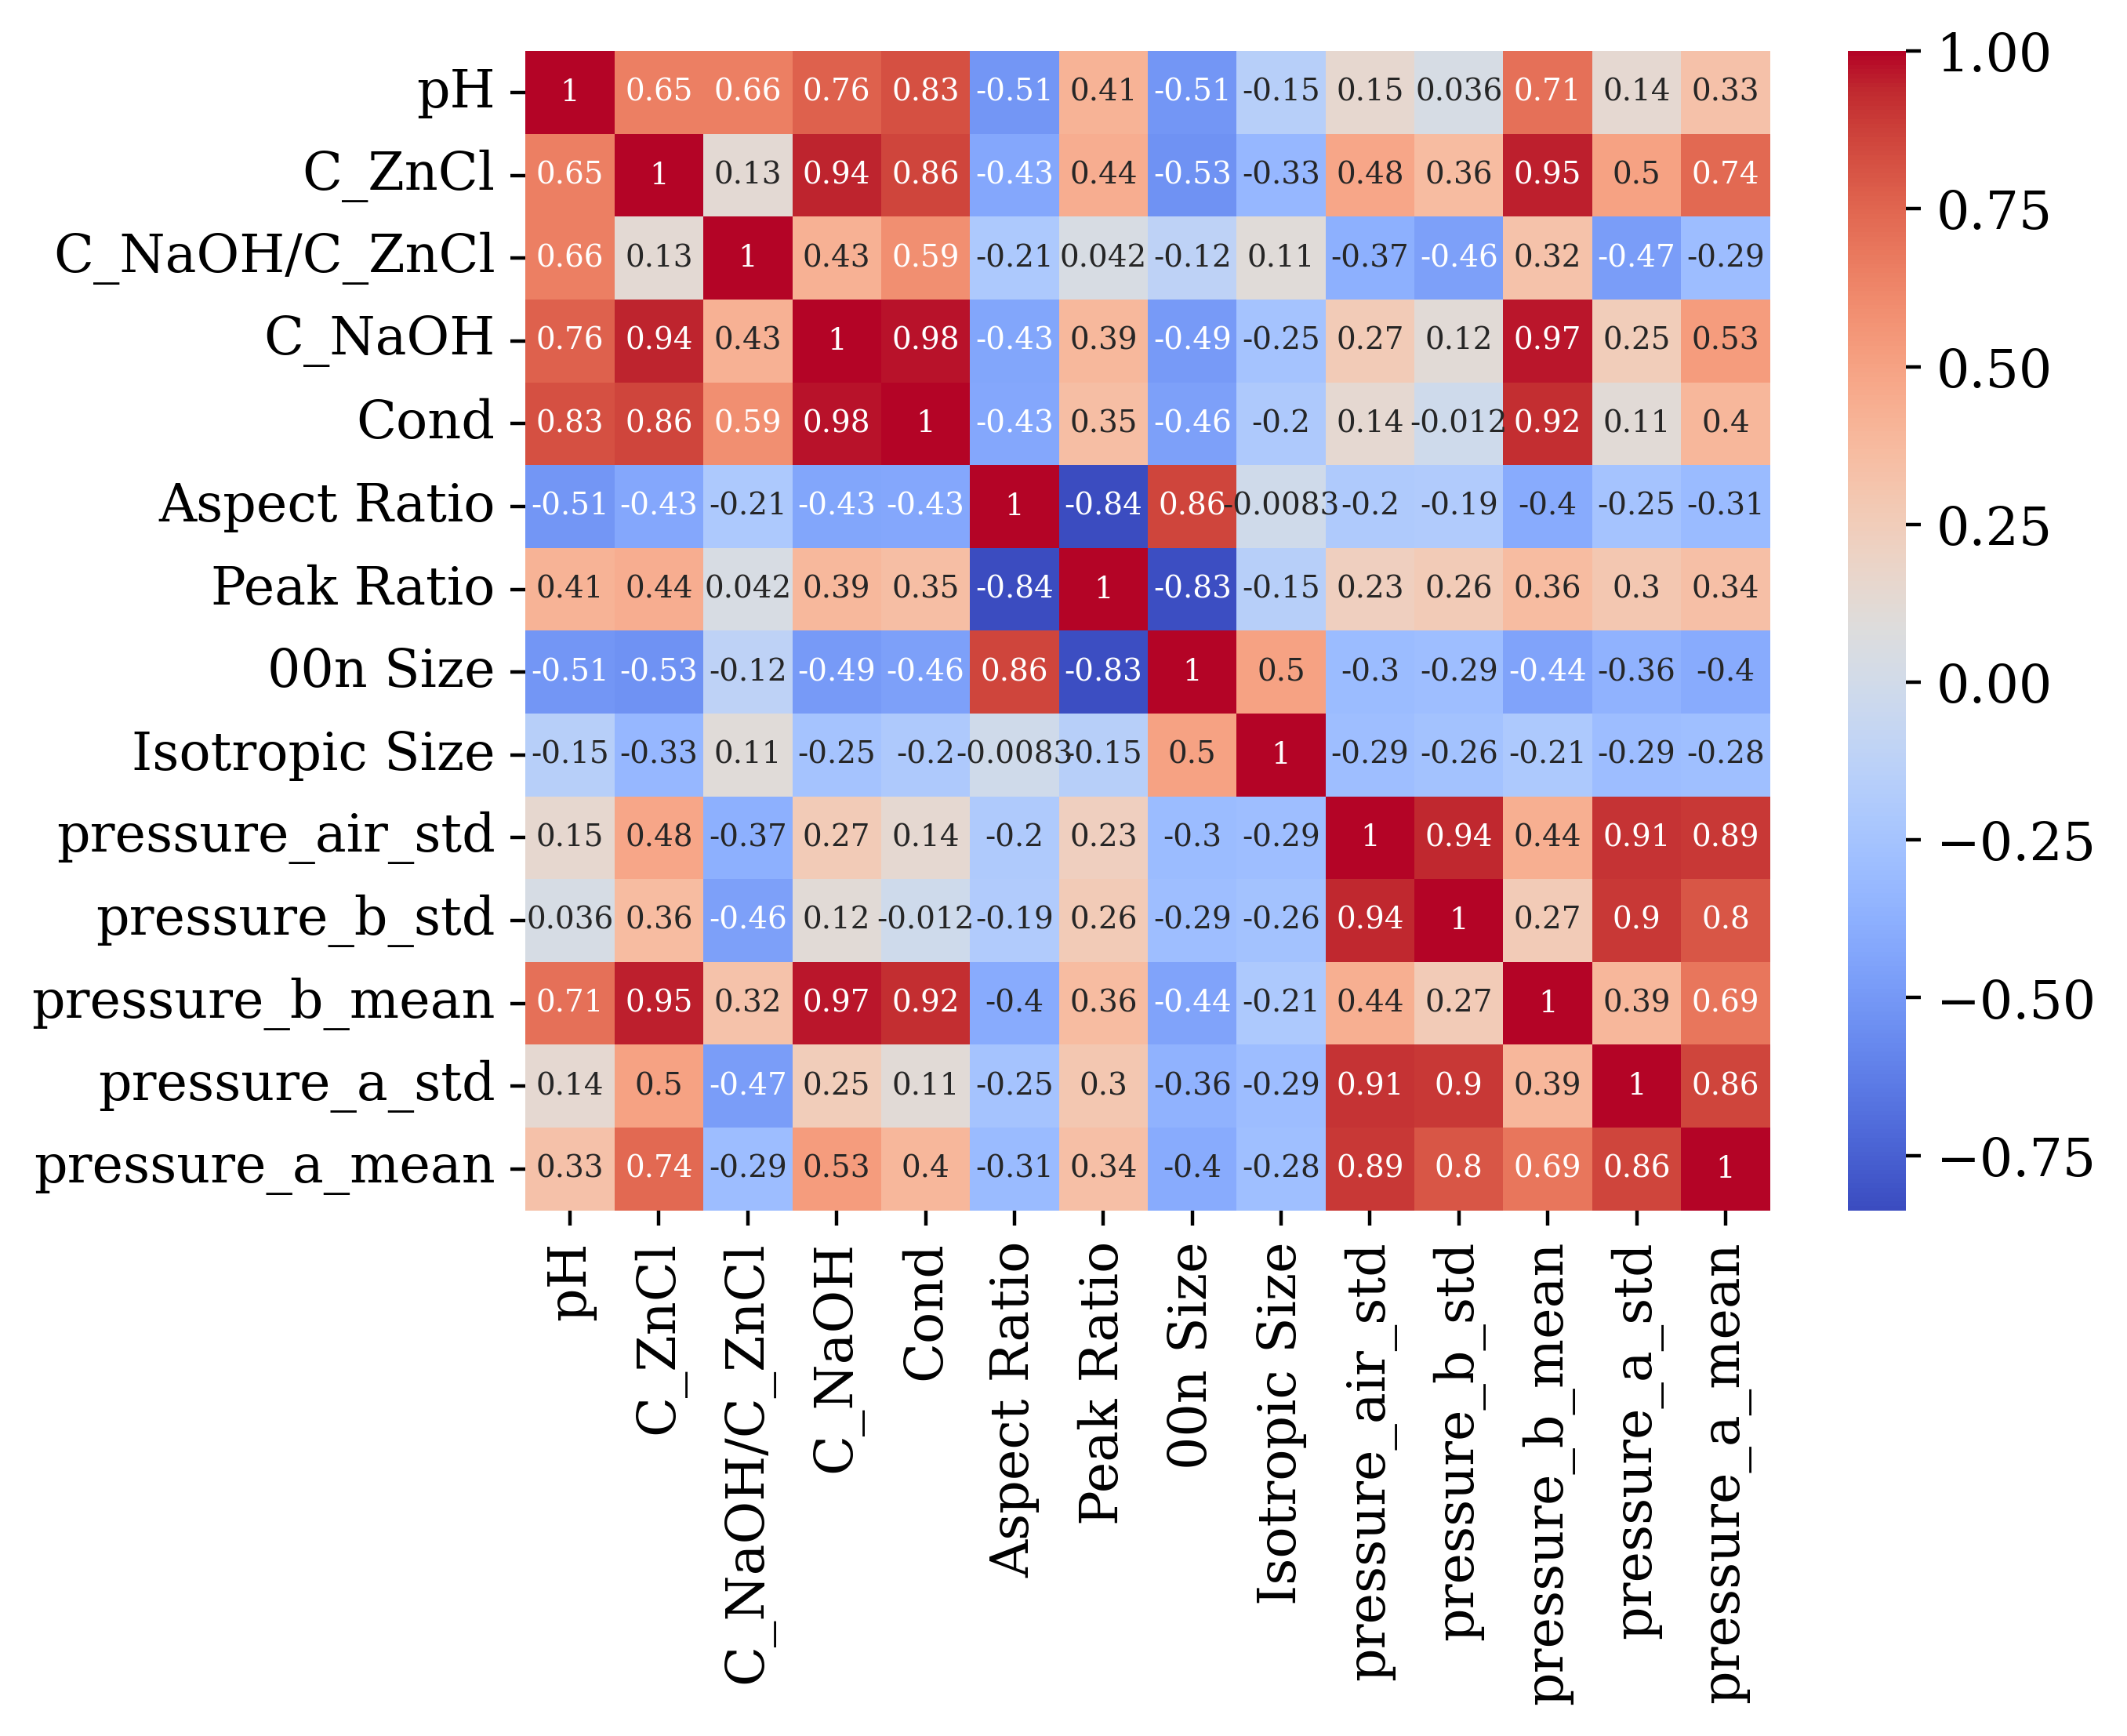

2024-02-13 10:57:17,881 ERROR: panel.reactive - Callback failed for object named "X-axis" changing property {'value': 'Peak Ratio'} 
Traceback (most recent call last):
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\panel\reactive.py", line 385, in _process_events
    self.param.update(**self_events)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2278, in update
    restore = self_._update(*args, **kwargs)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2318, in _update
    self_._batch_call_watchers()
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2509, in _batch_call_watchers
    self_._execute_watcher(watcher, events)
  File "c:\Users\queim\micromambaenv\envs\bo_env\lib\site-packages\param\parameterized.py", line 2471, in _execute_watcher
    watcher.fn(*args, **kwargs)
  File "c:\Users\queim\micromambaenv\envs\bo_env

In [ ]:
import seaborn as sns
%matplotlib inline

#where pH is greater than 11
df_corr = df_mean_std[df_mean_std["pH"] > 11].select_dtypes(include="float").corr()
sns.heatmap(df_corr, annot=True,cmap="coolwarm", annot_kws={"size": 7})